In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

# Jupyter Notebooks for Research

## 1. Single Notebooks

This will usually be your starting point when you start a notebook for a research
project: you create a new notebook and start working.

### The first few cells

You'll notice that the first cell in here (above) is an import. I knew that I would use numpy
and pandas in this so that was the very first thing I did. I think having the dependencies
at the top is really useful as it makes it clear what you need available to run the notebook.
You might call that cell a *setup cell*.

The next thing I find myself doing is loading data. That data will be recalled throughout
so I would consider this a setup cell too.

In [3]:
# some awesome data
np.random.seed(seed=444)  # vcs would be a pain without this
df = pd.DataFrame(np.random.randn(100, 4), columns=list('ABCD'))
df.head()

,A,B,C,D
0,0.357440,0.377538,1.382338,1.175549
1,-0.939276,-1.143150,-0.542440,-0.548708
2,0.208520,0.212690,1.268021,-0.807303
3,-3.303072,-0.806650,-0.360329,-0.880396
4,0.152631,0.250250,0.078508,-0.903904


Now we have a DataFrame called `df` in memory. This is available globally:

In [4]:
# here's `df` again in a different cell
df.sample(3)

,A,B,C,D
86,0.290166,-0.231428,-0.712496,-0.755546
20,-1.621449,-1.223276,0.258372,0.540705
59,2.238800,-0.271408,0.206005,2.870687


### Keep up the narrative

A little bit of exploratory analysis is in order. I suppose first we might look at the univariate
distributions.

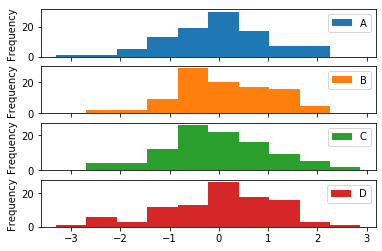

In [5]:
ax = df.plot.hist(subplots=True)

These data seem to be as expected given how they were generated. Let's see if A and B are
related somehow.

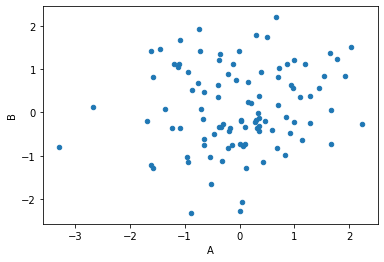

In [6]:
ax = df.plot.scatter(x='A', y='B')

Hmmm... no correlation to see here.

So far I think this notebook is pretty clear. Aren't notebooks awesome? Obviously.

## Time for some transformations

At somepoint you might want to transform your data. For whatever reason, you might
find it convenient or even logical to modify you existing data object instead of
creating a new one. In this example, we'll add a column to `df`.

**If you're totally new to notebooks, before moving on, try restarting the kernel and
running the next cell.*

In [7]:
df = df.assign(A2=2*df.A + df.B)
df.head()

,A,B,C,D,A2
0,0.357440,0.377538,1.382338,1.175549,1.092418
1,-0.939276,-1.143150,-0.542440,-0.548708,-3.021702
2,0.208520,0.212690,1.268021,-0.807303,0.629729
3,-3.303072,-0.806650,-0.360329,-0.880396,-7.412793
4,0.152631,0.250250,0.078508,-0.903904,0.555513


Now we have a new column we can play with. Maybe we'll plot it:

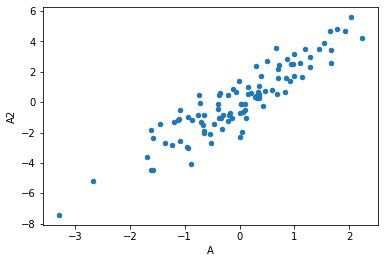

In [8]:
ax = df.plot.scatter(x='A', y='A2')

No surprises there. Now go back and run the 5th code cell, the one with the histograms. This is what you'll see:

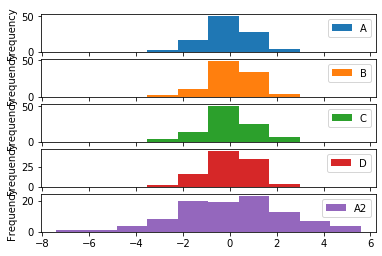

In [9]:
ax = df.plot.hist(subplots=True)

There are other modifications we could make. For instance, let's drop a
column.

In [10]:
df = df.drop('B', axis=1)
df.head()

,A,C,D,A2
0,0.357440,1.382338,1.175549,1.092418
1,-0.939276,-0.542440,-0.548708,-3.021702
2,0.208520,1.268021,-0.807303,0.629729
3,-3.303072,-0.360329,-0.880396,-7.412793
4,0.152631,0.078508,-0.903904,0.555513


Easy. Now rerun that cell.

Yuuk, we don't want that in our notebook. In this case, I'd suggest you just rerun
the whole notebook, but what if your notebook takes more than a few minutes to run
and you've just had a tea? I guess you could just clear the exception, or comment
out df.drop, or just meticulously rerun the dependencies of your current cell...